In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
treatsdf = pd.read_csv('../data/treatscleaned_final.csv')
ingcount = pd.read_csv('../data/ingredientscount.csv')

In [3]:
treatsdf.head()

,urls,product,price,size,rating,reviews,ing_count,ing_cleaned
0,https://www.petsmart.com/dog/treats/biscuits-a...,KONG® Ziggies™ Dog Treat,2.49,1.0,4.2,25,18,Pea Starch | Vegetable Glycerin | Sweet Potato...
1,https://www.petsmart.com/dog/treats/biscuits-a...,KONG® Snacks™ Peanut Butter Dog Treat,11.99,11.0,3.9,35,14,Whole Wheat Flour | Oat Flour | Peanuts | Cano...
2,https://www.petsmart.com/dog/treats/biscuits-a...,Hill's® Science Diet® Dog Treat,7.49,8.0,5.0,12,12,Chicken | Peas | Potatoes | Potato Starch | Ch...
3,https://www.petsmart.com/dog/treats/biscuits-a...,Blue Buffalo® All Life Stages Treat Dog Treats...,4.99,16.0,4.6,802,15,Oatmeal | Ground Barley | Ground Whole Oats |...
4,https://www.petsmart.com/dog/treats/biscuits-a...,Milk-Bone Flavor Snacks Dog Treat All Ages - B...,11.49,36.0,4.8,205,32,Ground Whole Wheat | Wheat Flour | Meat And Bo...


In [4]:
ingcount.head()

,ingredient,count
0,Salt,58
1,Sugar,38
2,Wheat Flour,34
3,Vanilla,32
4,Rosemary Extract,30


In [5]:
treatsdf.head()

,urls,product,price,size,rating,reviews,ing_count,ing_cleaned
0,https://www.petsmart.com/dog/treats/biscuits-a...,KONG® Ziggies™ Dog Treat,2.49,1.0,4.2,25,18,Pea Starch | Vegetable Glycerin | Sweet Potato...
1,https://www.petsmart.com/dog/treats/biscuits-a...,KONG® Snacks™ Peanut Butter Dog Treat,11.99,11.0,3.9,35,14,Whole Wheat Flour | Oat Flour | Peanuts | Cano...
2,https://www.petsmart.com/dog/treats/biscuits-a...,Hill's® Science Diet® Dog Treat,7.49,8.0,5.0,12,12,Chicken | Peas | Potatoes | Potato Starch | Ch...
3,https://www.petsmart.com/dog/treats/biscuits-a...,Blue Buffalo® All Life Stages Treat Dog Treats...,4.99,16.0,4.6,802,15,Oatmeal | Ground Barley | Ground Whole Oats |...
4,https://www.petsmart.com/dog/treats/biscuits-a...,Milk-Bone Flavor Snacks Dog Treat All Ages - B...,11.49,36.0,4.8,205,32,Ground Whole Wheat | Wheat Flour | Meat And Bo...


In [18]:
#creating a column identifying whether or not a treat is limited ingredient.
#there is no regulatory meaning of 'Limited Ingredient', so 8 is selected as the cutoff based on the
#maximum number of ingredients present in our existing homemade dog treat recipes, 8 also represents the 25%ile.

limited_ing = []

for x in treatsdf['ing_count']:
    if x <= 8:
        limited_ing.append('Yes')
    else:
        limited_ing.append('No')

In [21]:
treatsdf['limited_ing'] = limited_ing

In [22]:
treatsdf.describe()

,price,size,rating,reviews,ing_count
count,137.000000,137.000000,137.000000,137.000000,137.000000
mean,8.121387,14.625912,3.817518,95.978102,16.197080
std,5.625870,23.962489,1.587168,165.174260,10.279076
min,0.990000,1.000000,0.000000,0.000000,1.000000
25%,3.990000,1.000000,3.700000,4.000000,8.000000
50%,6.990000,8.000000,4.500000,26.000000,13.000000
75%,10.990000,16.000000,4.800000,123.000000,23.000000
max,29.990000,160.000000,5.000000,905.000000,39.000000


In [43]:
treatsdf.corr()

,price,size,rating,reviews,ing_count
price,1.000000,0.198122,-0.029112,-0.021003,-0.171544
size,0.198122,1.000000,0.139896,0.357391,0.245762
rating,-0.029112,0.139896,1.000000,0.300644,0.183085
reviews,-0.021003,0.357391,0.300644,1.000000,0.101615
ing_count,-0.171544,0.245762,0.183085,0.101615,1.000000


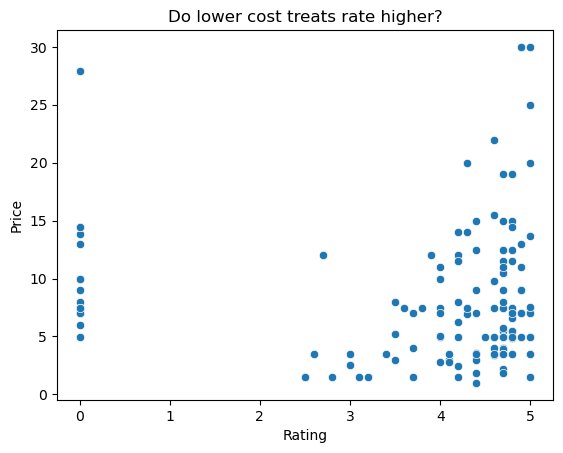

In [27]:
#plotting dog treat price against rating.

sns.scatterplot(x = treatsdf['rating'], y = treatsdf['price'])
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Do lower cost treats rate higher?")
plt.show()

Price and rating relationship seems to imply that lower cost treats typically rate higher. Calculated correlation coeffecient doesn't mathematically support this, however.

Research paper "Price Effects in Online Product Reviews: An Analytical Model and Empirical Analysis." appears to confirm that uni-dimensional rating systems are substantially biased by price, where rating is based more on 'perceived value' over 'perceived quality'.

Li, Xinxin, and Lorin M. Hitt. “Price Effects in Online Product Reviews: An Analytical Model and Empirical Analysis.” MIS Quarterly, vol. 34, no. 4, 2010, pp. 809–31. JSTOR, https://doi.org/10.2307/25750706. Accessed 14 June 2023.

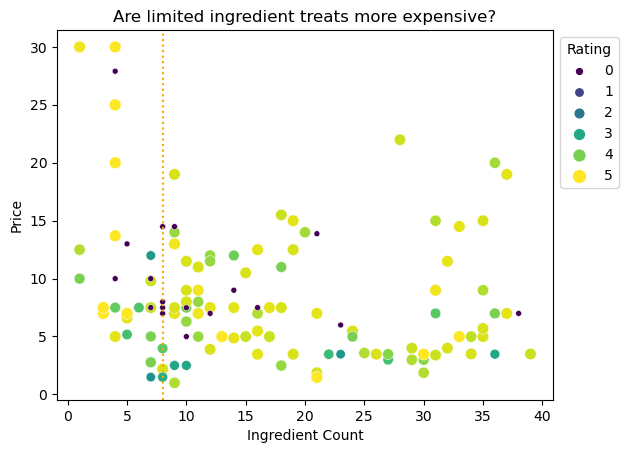

In [57]:
#plotting ingredient count against price.

sns.scatterplot(x = treatsdf['ing_count'], y = treatsdf['price'], size = treatsdf['rating'], hue = treatsdf['rating'], 
                palette = 'viridis')
plt.xlabel('Ingredient Count')
plt.ylabel('Price')
plt.title("Are limited ingredient treats more expensive?")
plt.axvline(x = 8, linestyle = ':', color = 'orange')
plt.legend(title = "Rating", bbox_to_anchor = (1.0, 1.0))
plt.show()

The most expensive treats are considered 'Limited Ingredient'. It doesn't appear to directly correlate, with a calculated correlation coeffecient of -.17. The vertical line represents my cutoff for 'limited ingredient' treats.

In [65]:
#calculating cost per ounce for treats

cost_per_oz = treatsdf['price'] / treatsdf['size']

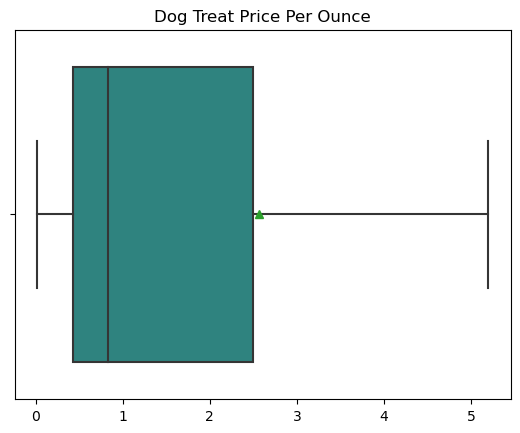

In [86]:
#plotting distribution of cost per ounce, removed outliers for a cleaner presentation.

sns.boxplot(x = cost_per_oz, showfliers = False, palette = 'viridis', showmeans=True)
plt.title('Dog Treat Price Per Ounce')
plt.show()

While I made an effort to convert all measures to ounces, few are by count. I believe this skews the chart a bit to the right, but not significantly. Initial cleaning steps showed <1% of items were sized by count.

In [84]:
#basics stats relative to cost per ounce.

cost_per_oz.describe()

count    137.000000
mean       2.561517
std        4.356909
min        0.021188
25%        0.433750
50%        0.832500
75%        2.490000
max       27.890000
dtype: float64

In [95]:
#quick math pricing an 8 ounce product based on median and mean cost per ounce.

print(.8325 * 8)
print(2.56 * 8)

6.66
20.48


An 8 ounce package priced using the median cost per ounce, prices a product at $6.66. 

Utilizing the mean price per ounce, prices an 8 ounce product at $20.48.

In [102]:
treatsdf.sort_values('price', ascending=False).head(20)

,urls,product,price,size,rating,reviews,ing_count,ing_cleaned,limited_ing
18,https://www.petsmart.com/dog/treats/biscuits-a...,Purebites® Freeze Dried Dog Treat - Beef,29.99,16.6,4.9,44,1,Beef Liver,Yes
109,https://www.petsmart.com/dog/treats/biscuits-a...,Pooch Creamery Ice Cream Dog Treat - 4 Pack,29.99,4.0,5.0,1,4,Whole Milk | Cane Sugar | Gelatin | Salt And ...,Yes
123,https://www.petsmart.com/dog/treats/biscuits-a...,Pooch Cake Mix & Ice Cream Dog Treat - 2 Pack,27.89,1.0,0.0,0,4,White Rice Flour | Sugar | Peanuts | Baking Po...,Yes
106,https://www.petsmart.com/dog/treats/biscuits-a...,Pooch Cake Mix & Ice Cream Kit Dog Treat,24.99,1.0,5.0,1,4,White Rice Flour | Sugar | Peanuts | Baking Po...,Yes
9,https://www.petsmart.com/dog/treats/biscuits-a...,Zuke's® HIP ACTION All Life Stages Dog Treats ...,21.98,16.0,4.6,157,28,Beef | Rice | Oats | Malted Barley Extract | M...,No
107,https://www.petsmart.com/dog/treats/biscuits-a...,Blue Buffalo® All Life Stages Treat Dog Treats...,19.99,12.0,4.3,3,36,Oat Flour | Oatmeal | Oat Fiber | Chicken Meal...,No
114,https://www.petsmart.com/dog/treats/biscuits-a...,Pooch Cake Mix Dog Treat,19.99,1.0,5.0,2,4,White Rice Flour | Sugar | Peanuts | Baking Po...,Yes
51,https://www.petsmart.com/dog/treats/biscuits-a...,Blue Buffalo® Wilderness™ All Life Stages Trea...,18.99,36.0,4.7,44,9,Duck | Chicken Meal | Potato | Chicken Fat | F...,No
133,https://www.petsmart.com/dog/treats/biscuits-a...,Greenies Smartbites Immune Support Crunchy & S...,18.99,28.0,4.8,123,37,Chicken Meal | Brewers Rice | Ground Whole Whe...,No
42,https://www.petsmart.com/dog/treats/biscuits-a...,Blue Buffalo® All Life Stages Treat Dog Treats...,15.49,56.0,4.6,204,18,Oatmeal | Oat Flour | Barley | Rye | Chicken M...,No


In [91]:
#understanding common pack sizes

treatsdf['size'].describe()

count    137.000000
mean      14.625912
std       23.962489
min        1.000000
25%        1.000000
50%        8.000000
75%       16.000000
max      160.000000
Name: size, dtype: float64

6.66
20.48


50%ile for product size is 8 ounces. 